In [11]:
import pandas as pd
import folium
import seaborn as sns
import numpy as np
import warnings
sns.set(rc={'figure.figsize':(20, 6)})

In [12]:
warnings.filterwarnings('ignore')

In [2]:
sadi = pd.read_csv('data/cammesa/sadi_centrales.csv', sep=";")

In [3]:
df_sadi = sadi[['id', 'Nombre', 'Nemo', 'Tipo', 'Potencia', 'Region', 'lat', 'lon']]
df_sadi

,id,Nombre,Nemo,Tipo,Potencia,Region,lat,lon
0,639.0,P.E. ARAUCO II (ETAPA 1 Y 2),AR21EO,eolicas,99.75,NOA,-28.713251,-66.705385
1,506.0,ARAUCO EOLICO,ARAUEO,eolicas,25.20,NOA,-28.701939,-66.752040
2,568.0,ARAUCO EOLICO 2,ARA2EO,eolicas,25.20,CUY,-28.692980,-66.754425
3,614.0,EL JUME,JUMEEO,eolicas,8.00,NOA,-29.419391,-63.709658
4,669.0,P.E. Achiras,ACHIEO,eolicas,48.00,CEN,-33.213184,-65.080059
...,...,...,...,...,...,...,...,...
351,734.0,C.T. ARREBEEF ENERGIA,ABEF,termicas,1.50,BSAS,-33.762503,-60.090875
352,630.0,G ROJO R.ENERGY,ROJO,termicas,258.00,BSAS,-33.454965,-60.281668
353,100.0,ACEROS PARANA,APAR,termicas,150.00,BSAS,-33.364149,-60.145681
354,322.0,AES-PARANA,AESP,termicas,870.00,BSAS,-33.354883,-60.171846


In [4]:
df_sadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        346 non-null    float64
 1   Nombre    356 non-null    object 
 2   Nemo      346 non-null    object 
 3   Tipo      356 non-null    object 
 4   Potencia  356 non-null    float64
 5   Region    356 non-null    object 
 6   lat       356 non-null    float64
 7   lon       356 non-null    float64
dtypes: float64(4), object(4)
memory usage: 22.4+ KB


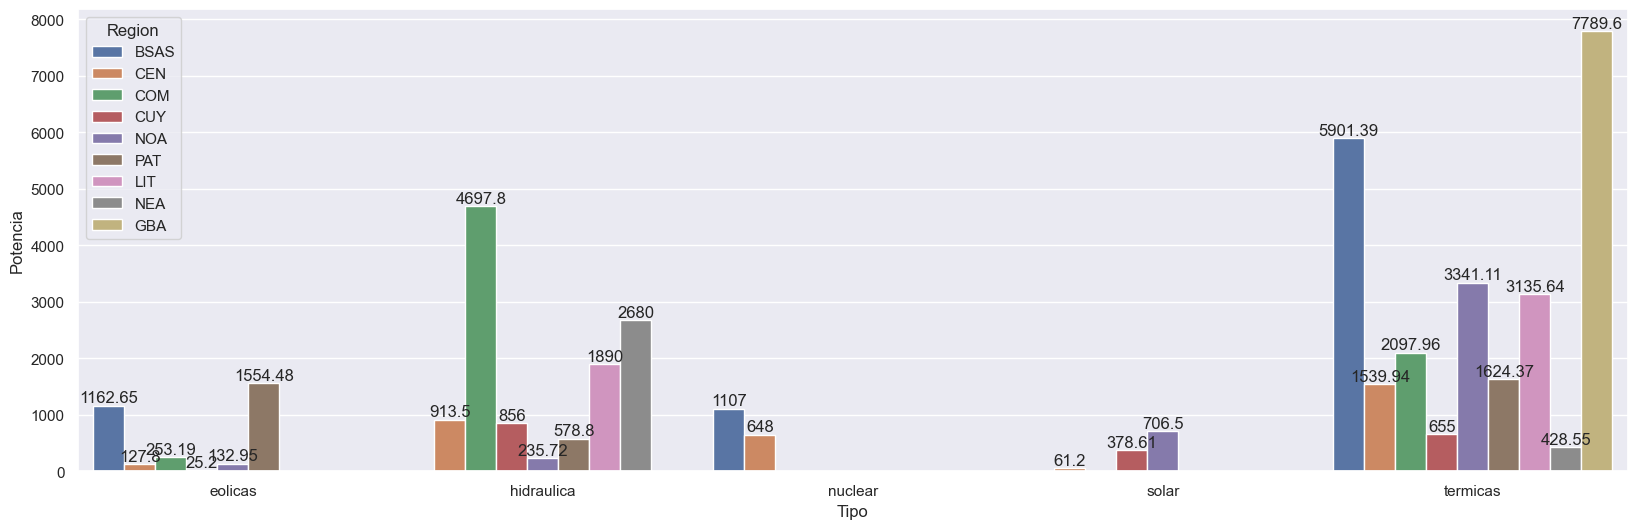

In [5]:
df_sadi_potencias = df_sadi \
    .groupby(['Tipo', 'Region']) \
    .agg({
        'Potencia': np.sum
    }) \
    .reset_index()


ax = sns.barplot(df_sadi_potencias, x='Tipo', y='Potencia', hue='Region', errorbar=None, width=0.9)
for i in ax.containers:
    ax.bar_label(i, )

In [6]:
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=4)

In [9]:
df_sadi = df_sadi.dropna()

In [13]:
colores = {
    'eolicas': 'green',
    'hidraulica': 'blue',
    'nuclear': 'orange',
    'solar': 'yellow',
    'termicas': 'red',
}

for idx in range(len(df_sadi)):
    location = df_sadi.iloc[idx][['lat', 'lon']]
    folium.Marker(
        location=location,
        popup=f"{df_sadi.iloc[idx]['Tipo']}: {df_sadi.iloc[idx]['Nombre']}",
        #Cada icono tiene el color segun el tipo de central
        icon = folium.Icon(color=colores[df_sadi.iloc[idx]['Tipo']], icon='bolt', prefix='fa')
    ).add_to(mapa)

mapa